In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from matplotlib import pylab
from pylab import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve


In [2]:
df = pd.read_csv('/Users/munjismac/code/munjik/wbanalysis/raw_data/CompanyData-Data.csv')

In [3]:
df2 = pd.read_csv('/Users/munjismac/code/munjik/wbanalysis/raw_data/CompanyData-Data2.csv')
df2.head(10)

,symbol,GPM,A (SGA),B (RD),C (PPE),D (DEPR),E (CAPEX),F (NI/TR),G (NR/NI),H (currentRatio),I (ROA),J (LD/GP),K (debtToEquity),L (SD/LD),M (IN/OI),Dividend Yeild,N (Net Issuance),Buy =1 DontBuy = 0
0,AAPL,0.417794,0.143768,0.143382,0.258054,0.073831,-0.117079,0.258818,0.544001,1.074553,0.269742,0.713876,4.563512,0.143099,0.024277,0.005828,-8.486600e+10,1.0
1,AAPL,0.382332,0.189756,0.178665,0.350299,0.105339,-0.127310,0.209136,0.652227,1.363604,0.177256,0.940080,3.957039,0.139550,0.043341,0.007053,-7.147800e+10,1.0
2,AAPL,0.378178,0.185432,0.164820,0.379889,0.127521,-0.189934,0.212381,0.828942,1.540126,0.163230,0.933074,2.741004,0.176893,0.055936,0.012277,-6.611600e+10,1.0
3,AAPL,0.383437,0.164033,0.139789,0.405581,0.107061,-0.223631,0.224142,0.823017,1.123843,0.162775,0.920423,2.413301,0.221347,0.045699,0.013038,-7.206900e+10,1.0
4,AAPL,0.384699,0.173055,0.131325,0.383088,0.115177,-0.264627,0.210924,0.737792,1.276063,0.128826,1.102295,1.799906,0.190038,0.037868,0.014680,-3.234500e+10,1.0
5,AAPL,0.390760,0.168449,0.119210,0.320544,0.124669,-0.296539,0.211868,0.641298,1.352669,0.142024,0.895138,1.508292,0.153857,0.024257,0.018877,-2.922700e+10,1.0
6,AAPL,0.400599,0.153045,0.086162,0.240008,0.120234,-0.215155,0.228458,0.568285,1.108771,0.183814,0.571027,1.433740,0.205731,0.010291,0.017431,-3.471000e+10,1.0
7,AAPL,0.385880,0.170024,0.085643,0.292386,0.112650,-0.248368,0.216144,0.688914,1.080113,0.170420,0.410947,1.078397,0.217615,0.007314,0.017394,-4.427000e+10,1.0
8,AAPL,0.376245,0.168419,0.069591,0.258102,0.105079,-0.245052,0.216705,0.557308,1.678639,0.178923,0.263747,0.675449,0.000000,0.002776,0.021545,-2.233000e+10,1.0
9,AAPL,0.438712,0.146224,0.049241,0.225044,0.047727,-0.225289,0.266651,0.447895,1.495849,0.237033,0.000000,0.489417,0.000000,0.000000,0.004406,6.650000e+08,1.0


In [4]:
df.head(10)

,symbol,GPM,A (SGA),B (RD),C (PPE),D (DEPR),E (CAPEX),F (NI/TR),G (NR/NI),H (currentRatio),I (ROA),J (LD/GP),K (debtToEquity),L (SD/LD),M (IN/OI),Dividend Yeild,N (Net Issuance),Buy =1 DontBuy = 0
0,AAPL,0.417794,0.143768,0.143382,0.258054,0.073831,-0.117079,0.258818,0.544001,1.074553,0.269742,0.713876,4.563512,0.143099,0.024277,0.005828,-84866000000,1
1,AAPL,0.382332,0.189756,0.178665,0.350299,0.105339,-0.127310,0.209136,0.652227,1.363604,0.177256,0.940080,3.957039,0.139550,0.043341,0.007053,-71478000000,1
2,AAPL,0.378178,0.185432,0.164820,0.379889,0.127521,-0.189934,0.212381,0.828942,1.540126,0.163230,0.933074,2.741004,0.176893,0.055936,0.012277,-66116000000,1
3,AAPL,0.383437,0.164033,0.139789,0.405581,0.107061,-0.223631,0.224142,0.823017,1.123843,0.162775,0.920423,2.413301,0.221347,0.045699,0.013038,-72069000000,1
4,AAPL,0.384699,0.173055,0.131325,0.383088,0.115177,-0.264627,0.210924,0.737792,1.276063,0.128826,1.102295,1.799906,0.190038,0.037868,0.014680,-32345000000,1
5,AAPL,0.390760,0.168449,0.119210,0.320544,0.124669,-0.296539,0.211868,0.641298,1.352669,0.142024,0.895138,1.508292,0.153857,0.024257,0.018877,-29227000000,1
6,AAPL,0.400599,0.153045,0.086162,0.240008,0.120234,-0.215155,0.228458,0.568285,1.108771,0.183814,0.571027,1.433740,0.205731,0.010291,0.017431,-34710000000,1
7,AAPL,0.385880,0.170024,0.085643,0.292386,0.112650,-0.248368,0.216144,0.688914,1.080113,0.170420,0.410947,1.078397,0.217615,0.007314,0.017394,-44270000000,1
8,AAPL,0.376245,0.168419,0.069591,0.258102,0.105079,-0.245052,0.216705,0.557308,1.678639,0.178923,0.263747,0.675449,0.000000,0.002776,0.021545,-22330000000,1
9,AAPL,0.438712,0.146224,0.049241,0.225044,0.047727,-0.225289,0.266651,0.447895,1.495849,0.237033,0.000000,0.489417,0.000000,0.000000,0.004406,665000000,1


In [ ]:
df.shape

In [ ]:
df.info()

<h3>Missing Data </h3>

In [5]:
print(df.isnull().sum())
# after running the above we see that currentRatio has 4 missing values. Let's examine

symbol                0
GPM                   0
A (SGA)               0
B (RD)                0
C (PPE)               0
D (DEPR)              0
E (CAPEX)             0
F (NI/TR)             0
G (NR/NI)             0
H (currentRatio)      0
I (ROA)               0
J (LD/GP)             0
K (debtToEquity)      0
L (SD/LD)             0
M (IN/OI)             0
Dividend Yeild        0
N (Net Issuance)      0
Buy =1 DontBuy = 0    0
dtype: int64


<h3>Checking for Duplicates </h3>

In [ ]:
#  Check whether a row is a duplicated version of a previous row
df.duplicated().sum()

<p>We found 4 missing values: <b> Less than 30% of values missing: impute a value that makes sense e.g. Median, mean, mode.</b>
 </p>

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# imputer = SimpleImputer(strategy="mean") # Instanciate a SimpleImputer object with strategy of choice
# imputer.fit(df[['currentRatio']]) # Call the "fit" method on the object
# df['currentRatio'] = imputer.transform(df[['currentRatio']]) # Call the "transform" method on the object
# imputer.statistics_ # The mean is stored in the transformer's memory

<h2>Let's examine each feature and their Dtype </h2>
<h3>Let's change CalendarYear to a date time series</h3>

In [ ]:
df.info()

In [ ]:
df['calendarYear'] = pd.to_datetime(df['calendarYear'], format='%Y')
df['calendarYear'] = df['calendarYear'].dt.year

In [ ]:
df.info()

<h2>Feature scaling is essential for machine learning algorithms that calculate distances between data. </h2>

In [ ]:
# df = df.drop(columns='calendarYear')

In [ ]:
df.hist(figsize=(20,20))

In [ ]:
#function to return plots for the feature to see normal distribution
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

<b>A (SGA)</b>

In [ ]:
normality(df,'A (SGA)') 
#from the graphs I conclude this is normal distribution will use Robust

In [ ]:
columns_name = []
# for each column in the dataframe
for (columnName, columnData) in df.iteritems():
    columns_name.append(columnName)

In [ ]:
columns_name.remove('symbol')
columns_name

<p>GPM</p>

In [ ]:
columns_name[0]

In [ ]:
normality(df,columns_name[0]) #robust scaler

<b>B (RD) </b>

In [ ]:
normality(df,columns_name[2]) #robust scaler

<b>'C (PPE)'</b>

In [ ]:
normality(df,columns_name[3]) #robust

<b> 'D (DEPR)' </b>

In [ ]:
normality(df,columns_name[4]) #robust

<b>  'E (CAPEX)'</b>

In [ ]:
normality(df,columns_name[5]) #robust

<b> 'F (NR)'</b>

In [ ]:
normality(df,columns_name[6]) #robust

<b> currentRatio</b>

In [ ]:
normality(df,columns_name[7]) #min max???

In [ ]:
# 'G (ROA)',
#  'H (LD/GP)',
#  'debtToEquity',
#  'Net Issuance',
#  'Interest - income',
#  'Buy =1']

<b> G (ROA)</b>

In [ ]:
normality(df,columns_name[8]) #robust

<b>H (LD/GP)</b>

In [ ]:
normality(df,columns_name[9]) #robust

<b>debtToEquity </b>

In [ ]:
normality(df,columns_name[10]) #robust

<b>Net Issuance</b>

In [ ]:
normality(df,columns_name[11]) #robust

<b>Interest - income'</b>

In [ ]:
normality(df,columns_name[12]) #robust

<h1> Based off the Q plots and normal distribution I will choose Robust Scaling for all the features </h1>

In [ ]:
df.info()

In [ ]:
df.head(10)

In [ ]:
# df = df.drop(columns='symbol')


In [ ]:
# # let's explore the datafeatures correlation
# # correlation 
# corr = df.corr()
# top_corr_feat = corr.index
# plt.figure(figsize=(16, 10))
# sns.heatmap(df[top_corr_feat].corr(), annot=True, fmt='.0%')

In [ ]:
robust_scaler = RobustScaler() # instantiate
# robust_scaler.fit(X.iloc[:, 1: ]) #fit scaler to feature
# X_rescaled = robust_scaler.transform(X.iloc[:, 1: ]) #Scale


In [ ]:
# one hot encode the lender
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
final_ohe = encoder.fit_transform(df.symbol.values.reshape(-1,1)).toarray()
final_dfOneHot = pd.DataFrame(final_ohe, columns=['Stock_'+str(encoder.categories_[0][i]) for i in range(len(encoder.categories_[0]))])


In [ ]:
final_dfOneHot

In [ ]:
# concat the dataframe of our stock holders (lenders)
final_df = pd.concat([df, final_dfOneHot], axis=1)

In [ ]:
# lets drop symbol from our DF
final_df = final_df.drop(columns='symbol')

In [ ]:
final_df

In [ ]:
final_df = final_df.rename(columns={'Buy =1 DontBuy = 0': 'Purchase'})

In [ ]:
# features of X and create target y
X = final_df.drop(columns=['Purchase'])
y = final_df['Purchase']

In [ ]:
X.shape

In [ ]:
y.shape

<h2>Combining the dataset 2 sells into our main dataframe to allow ML model to have both buys and sell </h2>

In [6]:
df = df.rename(columns={'Buy =1 DontBuy = 0': 'Purchase'})

In [7]:
df2= df2.rename(columns={'Buy =1 DontBuy = 0': 'Purchase'})

In [8]:
final_df2 = df2[df2['Purchase'] == 0]

In [9]:
final_df2

,symbol,GPM,A (SGA),B (RD),C (PPE),D (DEPR),E (CAPEX),F (NI/TR),G (NR/NI),H (currentRatio),I (ROA),J (LD/GP),K (debtToEquity),L (SD/LD),M (IN/OI),Dividend Yeild,N (Net Issuance),Purchase
33,ALL,1.000000,0.129916,0.0,0.025630,0.002820,-0.089334,0.108495,3.235610,1.089910,0.040409,0.148428,3.613816,0.000000,0.053703,0.020003,-2.867000e+09,0.0
34,ALL,1.000000,0.147407,0.0,0.026246,0.002637,-0.123002,0.056562,6.980018,0.114575,0.020063,0.162024,4.266939,0.000000,0.120991,0.024624,-2.688000e+09,0.0
35,ALL,1.000000,0.120912,0.0,0.027827,0.012538,-0.093760,0.082780,4.611791,0.099939,0.028366,0.164832,3.985233,0.000000,0.083939,0.017986,-1.495000e+09,0.0
36,ALL,1.000000,0.112388,0.0,0.029151,0.010456,-0.166755,0.051377,7.640916,0.126343,0.017282,0.173729,4.279250,0.000000,0.107117,0.021357,-1.337000e+09,0.0
37,ALL,1.000000,0.114464,0.0,0.028721,0.010406,-0.139567,0.060892,6.477199,0.102645,0.020744,0.143719,4.226267,0.000000,0.088970,0.024643,-2.808000e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,YUM,0.477492,0.731627,0.0,0.914759,0.106627,0.117886,0.083849,0.288165,0.542878,0.129916,0.692470,2.571160,0.063506,0.124294,0.005816,-1.030000e+08,0.0
1079,YUM,0.473425,0.743895,0.0,0.826980,0.105420,-1.539952,0.069364,0.355691,0.551677,0.109786,0.462180,4.017857,0.077947,0.127378,0.019322,-5.200000e+07,0.0
1080,YUM,0.460624,0.655842,0.0,0.704968,0.107133,-0.912281,0.052800,0.731235,0.480263,0.107963,0.665279,8.090909,0.062654,0.129093,0.018813,-1.790000e+08,0.0
1081,YUM,0.437411,0.722462,0.0,0.683315,0.112581,-1.056180,0.074043,0.256778,0.303047,0.112124,0.645518,41.192308,0.067080,0.128669,0.017653,-1.040000e+08,0.0


In [10]:
complete_df = pd.concat([df, final_df2], axis=0)

In [11]:
complete_df

,symbol,GPM,A (SGA),B (RD),C (PPE),D (DEPR),E (CAPEX),F (NI/TR),G (NR/NI),H (currentRatio),I (ROA),J (LD/GP),K (debtToEquity),L (SD/LD),M (IN/OI),Dividend Yeild,N (Net Issuance),Purchase
0,AAPL,0.417794,0.143768,0.143382,0.258054,0.073831,-0.117079,0.258818,0.544001,1.074553,0.269742,0.713876,4.563512,0.143099,0.024277,0.005828,-8.486600e+10,1.0
1,AAPL,0.382332,0.189756,0.178665,0.350299,0.105339,-0.127310,0.209136,0.652227,1.363604,0.177256,0.940080,3.957039,0.139550,0.043341,0.007053,-7.147800e+10,1.0
2,AAPL,0.378178,0.185432,0.164820,0.379889,0.127521,-0.189934,0.212381,0.828942,1.540126,0.163230,0.933074,2.741004,0.176893,0.055936,0.012277,-6.611600e+10,1.0
3,AAPL,0.383437,0.164033,0.139789,0.405581,0.107061,-0.223631,0.224142,0.823017,1.123843,0.162775,0.920423,2.413301,0.221347,0.045699,0.013038,-7.206900e+10,1.0
4,AAPL,0.384699,0.173055,0.131325,0.383088,0.115177,-0.264627,0.210924,0.737792,1.276063,0.128826,1.102295,1.799906,0.190038,0.037868,0.014680,-3.234500e+10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,YUM,0.477492,0.731627,0.000000,0.914759,0.106627,0.117886,0.083849,0.288165,0.542878,0.129916,0.692470,2.571160,0.063506,0.124294,0.005816,-1.030000e+08,0.0
1079,YUM,0.473425,0.743895,0.000000,0.826980,0.105420,-1.539952,0.069364,0.355691,0.551677,0.109786,0.462180,4.017857,0.077947,0.127378,0.019322,-5.200000e+07,0.0
1080,YUM,0.460624,0.655842,0.000000,0.704968,0.107133,-0.912281,0.052800,0.731235,0.480263,0.107963,0.665279,8.090909,0.062654,0.129093,0.018813,-1.790000e+08,0.0
1081,YUM,0.437411,0.722462,0.000000,0.683315,0.112581,-1.056180,0.074043,0.256778,0.303047,0.112124,0.645518,41.192308,0.067080,0.128669,0.017653,-1.040000e+08,0.0


In [12]:
# one hot encode the lender
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
final_ohe = encoder.fit_transform(complete_df.symbol.values.reshape(-1,1)).toarray()
final_dfOneHot = pd.DataFrame(final_ohe, columns=['Stock_'+str(encoder.categories_[0][i]) for i in range(len(encoder.categories_[0]))])


In [13]:
complete_df = complete_df.reset_index(drop=True)

In [14]:
# concat the dataframe of our stock holders (lenders)
final_df = pd.concat([complete_df, final_dfOneHot], axis=1)

In [15]:
final_df

,symbol,GPM,A (SGA),B (RD),C (PPE),D (DEPR),E (CAPEX),F (NI/TR),G (NR/NI),H (currentRatio),...,Stock_PG,Stock_PGR,Stock_PM,Stock_PZZA,Stock_SBUX,Stock_TAP,Stock_UNP,Stock_WFC,Stock_WMT,Stock_YUM
0,AAPL,0.417794,0.143768,0.143382,0.258054,0.073831,-0.117079,0.258818,0.544001,1.074553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAPL,0.382332,0.189756,0.178665,0.350299,0.105339,-0.127310,0.209136,0.652227,1.363604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAPL,0.378178,0.185432,0.164820,0.379889,0.127521,-0.189934,0.212381,0.828942,1.540126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAPL,0.383437,0.164033,0.139789,0.405581,0.107061,-0.223631,0.224142,0.823017,1.123843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAPL,0.384699,0.173055,0.131325,0.383088,0.115177,-0.264627,0.210924,0.737792,1.276063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,YUM,0.477492,0.731627,0.000000,0.914759,0.106627,0.117886,0.083849,0.288165,0.542878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1035,YUM,0.473425,0.743895,0.000000,0.826980,0.105420,-1.539952,0.069364,0.355691,0.551677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1036,YUM,0.460624,0.655842,0.000000,0.704968,0.107133,-0.912281,0.052800,0.731235,0.480263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1037,YUM,0.437411,0.722462,0.000000,0.683315,0.112581,-1.056180,0.074043,0.256778,0.303047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# lets drop symbol from our DF
final_df = final_df.drop(columns='symbol')

In [17]:
final_df.columns.to_list()

['GPM',
 'A (SGA)',
 'B (RD)',
 'C (PPE)',
 'D (DEPR)',
 'E (CAPEX)',
 'F (NI/TR)',
 'G (NR/NI)',
 'H (currentRatio)',
 'I (ROA)',
 'J (LD/GP)',
 'K (debtToEquity)',
 'L (SD/LD)',
 'M (IN/OI)',
 'Dividend Yeild',
 'N (Net Issuance)',
 'Purchase',
 'Stock_AAPL',
 'Stock_ALL',
 'Stock_AMZN',
 'Stock_AXP',
 'Stock_BTI',
 'Stock_BUD',
 'Stock_CNI',
 'Stock_COF',
 'Stock_COST',
 'Stock_CSCO',
 'Stock_CSX',
 'Stock_DFS',
 'Stock_DPZ',
 'Stock_DQ',
 'Stock_GOOGL',
 'Stock_HD',
 'Stock_HRB',
 'Stock_HSY',
 'Stock_KHC',
 'Stock_KO',
 'Stock_LOW',
 'Stock_MA',
 'Stock_MCO',
 'Stock_MSFT',
 'Stock_NSC',
 'Stock_ORCL',
 'Stock_PEP',
 'Stock_PG',
 'Stock_PGR',
 'Stock_PM',
 'Stock_PZZA',
 'Stock_SBUX',
 'Stock_TAP',
 'Stock_UNP',
 'Stock_WFC',
 'Stock_WMT',
 'Stock_YUM']

<h2>Baseline KNN model</h2>

In [18]:
# features of X and create target y
X = final_df.drop(columns=['Purchase'])
y = final_df['Purchase']

In [19]:
print(X.shape)
print(y.shape)

(1039, 53)
(1039,)


In [35]:
# lets produce final model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state=0)

knn_model = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_validate(knn_model, X_train, y_train, cv = 5)
cv_score_mean = np.mean(cv_scores['test_score'])
cv_score_mean

0.7056778460085026

In [25]:
robust_scaler = RobustScaler() # instantiate
min_max_scaler = MinMaxScaler() # instantiate

5-fold cross validate a simple KNN classifier taking into account 5 of the closest neighbor, and compute its mean cv-score

In [36]:
# scaling is moved up to robust scaler and score improves
robust_scaler.fit(X_train)
# min_max_scaler.fit(X_train)
rescaled_X_train = robust_scaler.transform(X_train)
# rescaled_X_train = min_max_scaler.transform(X_train)

cv_scores = cross_validate(knn_model, rescaled_X_train, y_train, cv = 5)
cv_score_mean = np.mean(cv_scores['test_score'])
cv_score_mean

0.8802928672649977

In [37]:
# with no scaler
knn_model.fit(X_train,y_train)
knn_model.score(X_test, y_test)

0.717948717948718

<h3>Assuming no grid search or hyperparameters </h3>

In [38]:
#with sclaer
knn_model.fit(rescaled_X_train, y_train)
rescaled_X_test = robust_scaler.transform(X_test)
#score the model on the Testing Data
knn_score = knn_model.score(rescaled_X_test, y_test)

In [39]:
knn_score

0.9262820512820513

In [30]:
# r2_test = knn_model.score(rescaled_X_test, y_test)
r2_test = knn_model.score(rescaled_X_test, y_test)

In [31]:
print(r2_test)

0.9615384615384616


In [32]:
# y_pred = knn_model.predict(rescaled_X_test)
y_pred = knn_model.predict(rescaled_X_test)

In [33]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))

[[ 82  10]
 [  2 218]]
0.9615384615384616
[0.89130435 0.99090909]
[0.97619048 0.95614035]


<h3>Overfitting? </h3>

In [ ]:
#Building the learning curve
train_size,train_scores,test_scores = learning_curve(estimator=knn_model,X=rescaled_X_train,y=y_train,cv=5,scoring="accuracy",random_state=11)
train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
print("cv_scores",cv_scores)
print("train_score",knn_score)
print("learning_curve",lc)


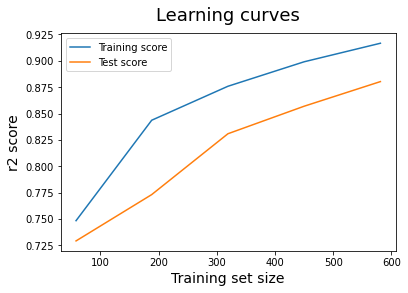

In [40]:
train_sizes = [58,188,319,450,581]
train_sizes, train_scores, test_scores = learning_curve(
estimator = knn_model, X = rescaled_X_train, y = y_train, train_sizes = train_sizes, cv = 5)
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

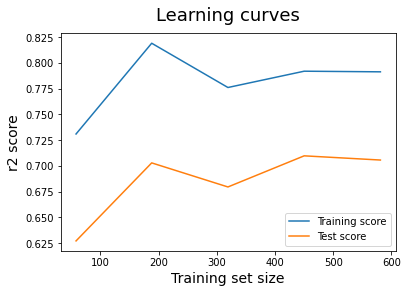

In [24]:
train_sizes = [58,188,319,450,581]
train_sizes, train_scores, test_scores = learning_curve(
estimator = knn_model, X = X_train, y = y_train, train_sizes = train_sizes, cv = 5)
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()